# Here’s the mystery we’re going to solve: 

which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the Data 

In [91]:
# First, make a variable called url_LondonHousePrices, and 
# assign it the following link, enclosed in quotation-marks as a 
# string:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the 
# houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.

# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, \
                           sheet_name='Average price', \
                           index_col= None)
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


## Cleaning, Transforming and Visualizing Data

### Exploring Your Data

In [92]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            336 non-null    datetime64[ns]
 1   City of London        337 non-null    object        
 2   Barking & Dagenham    337 non-null    object        
 3   Barnet                337 non-null    object        
 4   Bexley                337 non-null    object        
 5   Brent                 337 non-null    object        
 6   Bromley               337 non-null    object        
 7   Camden                337 non-null    object        
 8   Croydon               337 non-null    object        
 9   Ealing                337 non-null    object        
 10  Enfield               337 non-null    object        
 11  Greenwich             337 non-null    object        
 12  Hackney               337 non-null    object        
 13  Hammersmith & Fulham

In [93]:
properties.describe()

,Unnamed: 34,Unnamed: 37,Unnamed: 47
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [94]:
properties.isna().sum()

Unnamed: 0                1
City of London            0
Barking & Dagenham        0
Barnet                    0
Bexley                    0
Brent                     0
Bromley                   0
Camden                    0
Croydon                   0
Ealing                    0
Enfield                   0
Greenwich                 0
Hackney                   0
Hammersmith & Fulham      0
Haringey                  0
Harrow                    0
Havering                  0
Hillingdon                0
Hounslow                  0
Islington                 0
Kensington & Chelsea      0
Kingston upon Thames      0
Lambeth                   0
Lewisham                  0
Merton                    0
Newham                    0
Redbridge                 0
Richmond upon Thames      0
Southwark                 0
Sutton                    0
Tower Hamlets             0
Waltham Forest            0
Wandsworth                0
Westminster               0
Unnamed: 34             337
Inner London        

### Cleaning the data Part 1

* transpose your dataframe, 
* check out what its row indexes are, and reset the index. 
* Assign the values of the first row to your column headings. 

In [95]:
properties = properties.T
properties

,0,1,2,3,4,5,6,7,8,9,...,327,328,329,330,331,332,333,334,335,336
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,816775.77458,808791.66477,797896.0674,819762.37181,809689.46627,827996.60081,827441.27622,870799.60044,948073.2088,968059.9863
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,337639.17828,333921.39153,337201.79953,345873.99616,349371.12076,350239.35981,349653.85502,355290.62346,359495.10689,362054.07567
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,573655.09452,581811.27928,587188.06846,592754.89104,594041.83267,601931.6599,605424.18481,597777.32861,587967.70766,595486.30411
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,386972.05239,385161.3244,386673.4299,391819.71089,396385.99016,402667.50443,403468.56545,409719.69933,410407.63764,416059.80994
Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,73789.54287,...,508372.8301,522338.64309,533942.03626,536486.89116,552316.75952,562407.51963,584927.5386,578010.59307,572262.24808,566794.73925
Bromley,E09000006,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,81440.43008,...,480229.23775,486445.91707,491230.70286,502416.10181,505704.35059,513498.76677,515462.53348,522979.73425,523810.59406,523364.68872
Camden,E09000007,120932.8881,119508.8622,120282.2131,120097.899,119929.2782,121887.4625,124027.5768,125529.8039,120596.8511,...,878783.32113,876168.6135,852187.89719,837088.91944,851866.72294,867930.22712,857955.76149,841595.77335,838162.23572,842166.73612
Croydon,E09000008,69158.16225,68951.09542,68712.44341,68610.04641,68844.9169,69052.51103,69142.48112,68993.42545,69393.50023,...,408738.26012,411366.37096,414231.90527,414210.06504,418634.18288,426105.46581,432807.5594,434228.2722,432216.9619,430255.62154
Ealing,E09000009,79885.89069,80897.06551,81379.86288,82188.90498,82077.05525,81630.66181,82352.2226,82706.65927,82011.08271,...,513959.33601,511611.95205,515576.7603,524252.45609,534093.61223,537220.87128,540135.90519,541818.73318,543594.15108,548033.94229


In [96]:
# Reset the index -- Set the index back to a number.
properties = properties.reset_index()

In [97]:
# Assign the properties of the row to the columns headings
properites = properties.columns = properties.iloc[0]
properties = properties.tail(-1)
properties

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,816775.77458,808791.66477,797896.0674,819762.37181,809689.46627,827996.60081,827441.27622,870799.60044,948073.2088,968059.9863
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,337639.17828,333921.39153,337201.79953,345873.99616,349371.12076,350239.35981,349653.85502,355290.62346,359495.10689,362054.07567
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,573655.09452,581811.27928,587188.06846,592754.89104,594041.83267,601931.6599,605424.18481,597777.32861,587967.70766,595486.30411
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,386972.05239,385161.3244,386673.4299,391819.71089,396385.99016,402667.50443,403468.56545,409719.69933,410407.63764,416059.80994
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,508372.8301,522338.64309,533942.03626,536486.89116,552316.75952,562407.51963,584927.5386,578010.59307,572262.24808,566794.73925
6,Bromley,E09000006,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,...,480229.23775,486445.91707,491230.70286,502416.10181,505704.35059,513498.76677,515462.53348,522979.73425,523810.59406,523364.68872
7,Camden,E09000007,120932.8881,119508.8622,120282.2131,120097.899,119929.2782,121887.4625,124027.5768,125529.8039,...,878783.32113,876168.6135,852187.89719,837088.91944,851866.72294,867930.22712,857955.76149,841595.77335,838162.23572,842166.73612
8,Croydon,E09000008,69158.16225,68951.09542,68712.44341,68610.04641,68844.9169,69052.51103,69142.48112,68993.42545,...,408738.26012,411366.37096,414231.90527,414210.06504,418634.18288,426105.46581,432807.5594,434228.2722,432216.9619,430255.62154
9,Ealing,E09000009,79885.89069,80897.06551,81379.86288,82188.90498,82077.05525,81630.66181,82352.2226,82706.65927,...,513959.33601,511611.95205,515576.7603,524252.45609,534093.61223,537220.87128,540135.90519,541818.73318,543594.15108,548033.94229
10,Enfield,E09000010,72514.69096,73155.19746,72190.44144,71442.92235,70630.77955,71348.31147,71837.54011,72237.94562,...,435475.04961,441737.73847,447982.18283,447714.99777,448574.16678,453344.84583,458004.59535,465140.15651,466256.58204,469586.55163


## Cleaning the Data Part 2 

You might we have to rename a couple columns. How do you do this? The clue's pretty bold...


In [98]:
# Rename the columns you want to rename
properties = properties.rename(columns={"Unnamed: 0":"Bouroughs"})
properties.columns.values[1] = "Zip Code"

### Transform the Data

In [99]:
properties = properties.melt(id_vars=["Bouroughs", "Zip Code"])
properties = properties.rename(columns={0:"Date"})

In [100]:
properties.head(50)

,Bouroughs,Zip Code,Date,value
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.8881
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


### Cleaning the data (part 3)

Do we have an equal number of observations in the ID, 
Average Price, Month, and London Borough columns? Remember 
that there are only 32 London Boroughs. 
How many entries do you have in that column?

* I have found out that there are 48 boroughs so and have checked the
* wike page https://en.wikipedia.org/wiki/London_boroughsm, which I 
* will use to get the number do to 32

Removed the rows that had Unnammed since they were not boroghs 
Inner and outer are groups of boroughs and should be removed 
There is no mention of North East, North West, YORKS & THE HUMBER,
EAST MIDLANDS, WEST MIDLANDS, EAST OF ENGLAND, LONDON, SOUTH_EAST,
SOUTH_WEST in the wikipedia page mentioned above

Check out the contents of the London Borough column, and if 
you find null values, get rid of them however you see fit. 



In [101]:
def observations_per_bourough(dataframe):
    return properties.shape[0] /(properties.Bouroughs.nunique())
print(f"With {properties.Bouroughs.nunique()} bouroughs there are {observations_per_bourough(properties)} obersevations per bourough")

With 48 bouroughs there are 336.0 obersevations per bourough


In [102]:
# From the original data had 3 columns that started with Unnamed.
# Those columns had data that was missing, so I am just going to 
# get rid of them
properties = properties.dropna(axis=0)
print(f"With {properties.Bouroughs.nunique()} bouroughs there are {observations_per_bourough(properites)} observations per bourough")

With 45 bouroughs there are 336.0 observations per bourough


In [103]:
# We will go throught wikipedia and get use that as guide to what 
# bouroughs to keep
properties = properties.drop(properties[properties.Bouroughs == 'City of London'].index)
properties = properties.drop(properties[properties.Bouroughs == 'England'].index)
properties = properties.drop(properties[properties.Bouroughs == 'Inner London'].index)
properties = properties.drop(properties[properties.Bouroughs == 'Outer London'].index)
properties = properties.drop(properties[properties.Bouroughs == 'NORTH EAST'].index)
properties = properties.drop(properties[properties.Bouroughs == 'NORTH WEST'].index)
properties = properties.drop(properties[properties.Bouroughs == 'YORKS & THE HUMBER'].index)
properties = properties.drop(properties[properties.Bouroughs == 'EAST MIDLANDS'].index)
properties = properties.drop(properties[properties.Bouroughs == 'EAST MIDLANDS'].index)
properties = properties.drop(properties[properties.Bouroughs == 'WEST MIDLANDS'].index)
properties = properties.drop(properties[properties.Bouroughs == 'EAST OF ENGLAND'].index)
properties = properties.drop(properties[properties.Bouroughs == 'LONDON'].index)
properties = properties.drop(properties[properties.Bouroughs == 'SOUTH EAST'].index)
properties = properties.drop(properties[properties.Bouroughs == 'SOUTH WEST'].index)
properites = properties.reindex()
print(f"With {properties.Bouroughs.nunique()} bouroughs there are {observations_per_bourough(properites)} observations per bourough")

With 32 bouroughs there are 336.0 observations per bourough


### Visualizing the data
To visualize the data, why not subset on a particular London Borough? 
Maybe do a line plot of Month against Average Price?

To limit the number of data points you have, you might want to 
extract the year from every month value your Month column.

To this end, you could apply a lambda function. Your logic could 
work as follows:

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades?

In [104]:
# Parse out the year and put the value in its own column
#    look through the Month column
#    extract the year from each individual value in that column
#    store that corresponding year as separate column.
properties["year"] = properties.Date.dt.year
properties

,Bouroughs,Zip Code,Date,value,year
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266,1995
2,Barnet,E09000003,1995-01-01,93284.51832,1995
3,Bexley,E09000004,1995-01-01,64958.09036,1995
4,Brent,E09000005,1995-01-01,71306.56698,1995
5,Bromley,E09000006,1995-01-01,81671.47692,1995
...,...,...,...,...,...
16108,Sutton,E09000029,2022-12-01,450999.6808,2022
16109,Tower Hamlets,E09000030,2022-12-01,520524.72039,2022
16110,Waltham Forest,E09000031,2022-12-01,510178.70953,2022
16111,Wandsworth,E09000032,2022-12-01,657123.47553,2022


With 32 bouroughs there are 336.0 observations per bourough


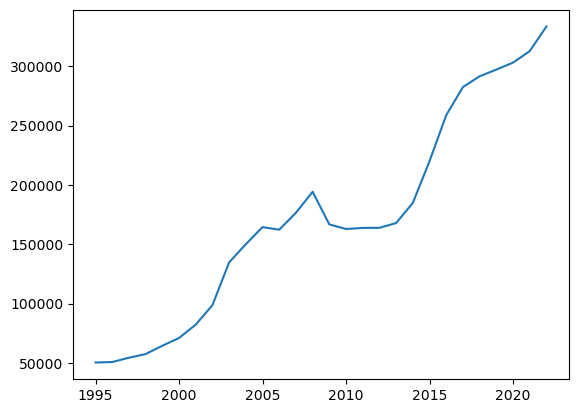

In [105]:
def pltPriceAndYear(borough, properties):
    y = properties[(properties.Bouroughs == 'Barking & Dagenham') & (properties.Date.dt.month == 1) ]['value']
    x = properties[(properties.Bouroughs == 'Barking & Dagenham') & (properties.Date.dt.month == 1) ]['year']
    plt.plot(x,y)
pltPriceAndYear("Barking & Dagenham", properties)
print(f"With {properties.Bouroughs.nunique()} bouroughs there are {observations_per_bourough(properites)} observations per bourough")

## Modeling

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:

Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].

Get the Average Price for that Borough, for the years 1998 and 2018.
Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.

Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great!

In [106]:
# Group by Bouroughs and get the first and last row.  The rows 
# contain the date and merge the tables so the earliest date/value
# is in the same row as the lastest data/value.
properties_without_year = properties.drop('year', axis=1)
groupby = properties_without_year.groupby("Bouroughs")
first = groupby.first()
last = groupby.last()
summary = first.merge(last, how='inner', on=['Bouroughs', 'Zip Code'], suffixes=['_first', '_last'])
summary

,Zip Code,Date_first,value_first,Date_last,value_last
Bouroughs,,,,,
Barking & Dagenham,E09000002,1995-01-01,50460.22660,2022-12-01,3.620541e+05
Barnet,E09000003,1995-01-01,93284.51832,2022-12-01,5.954863e+05
Bexley,E09000004,1995-01-01,64958.09036,2022-12-01,4.160598e+05
Brent,E09000005,1995-01-01,71306.56698,2022-12-01,5.667947e+05
Bromley,E09000006,1995-01-01,81671.47692,2022-12-01,5.233647e+05
Camden,E09000007,1995-01-01,120932.88810,2022-12-01,8.421667e+05
Croydon,E09000008,1995-01-01,69158.16225,2022-12-01,4.302556e+05
Ealing,E09000009,1995-01-01,79885.89069,2022-12-01,5.480339e+05
Enfield,E09000010,1995-01-01,72514.69096,2022-12-01,4.695866e+05


In [107]:
# Create a ratio where the numerator is the earliest price and the 
# denominiator is the lastest price
summary['ratio'] = summary.value_first / summary.value_last
summary['dfference'] = summary.value_last - summary.value_first
summary

,Zip Code,Date_first,value_first,Date_last,value_last,ratio,dfference
Bouroughs,,,,,,,
Barking & Dagenham,E09000002,1995-01-01,50460.22660,2022-12-01,3.620541e+05,0.139372,3.115938e+05
Barnet,E09000003,1995-01-01,93284.51832,2022-12-01,5.954863e+05,0.156653,5.022018e+05
Bexley,E09000004,1995-01-01,64958.09036,2022-12-01,4.160598e+05,0.156127,3.511017e+05
Brent,E09000005,1995-01-01,71306.56698,2022-12-01,5.667947e+05,0.125807,4.954882e+05
Bromley,E09000006,1995-01-01,81671.47692,2022-12-01,5.233647e+05,0.156051,4.416932e+05
Camden,E09000007,1995-01-01,120932.88810,2022-12-01,8.421667e+05,0.143597,7.212338e+05
Croydon,E09000008,1995-01-01,69158.16225,2022-12-01,4.302556e+05,0.160737,3.610975e+05
Ealing,E09000009,1995-01-01,79885.89069,2022-12-01,5.480339e+05,0.145768,4.681481e+05
Enfield,E09000010,1995-01-01,72514.69096,2022-12-01,4.695866e+05,0.154422,3.970719e+05


In [108]:
summary.describe()

,value_first,value_last,ratio,dfference
count,32.000000,3.200000e+01,32.000000,3.200000e+01
mean,81608.186320,5.779762e+05,0.141352,4.963680e+05
std,27116.992401,1.779328e+05,0.016437,1.528014e+05
min,50460.226600,3.620541e+05,0.095880,3.115938e+05
25%,67067.763912,4.663286e+05,0.128246,3.938846e+05
50%,72373.198165,5.451555e+05,0.143266,4.644038e+05
75%,85716.905445,6.105090e+05,0.155545,5.356082e+05
max,182694.832600,1.278176e+06,0.172083,1.095482e+06


#### Conclusions

> * The House market start with a min of 50460 to 362,054.10 and ended with max in the range of 182,694 to 1,279,186
> * The values of the homes have increased about 4 times